# 08_05: Summarizing and visualizing categorical data

In [1]:
import math
import collections
import dataclasses
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

In [2]:
smoking = pd.read_csv('whickham.csv')

# encoding the variables explicitly as categories will save memory and CPU
smoking.smoker = smoking.smoker.astype('category')
smoking.outcome = smoking.outcome.astype('category')

In [3]:
smoking.head()

,age,smoker,outcome
0,23,Yes,Alive
1,18,Yes,Alive
2,71,Yes,Dead
3,67,No,Alive
4,64,No,Alive


In [4]:
smoking.smoker.value_counts()

smoker
No     732
Yes    582
Name: count, dtype: int64

In [5]:
smoking.outcome.value_counts()

outcome
Alive    945
Dead     369
Name: count, dtype: int64

In [6]:
smoking.outcome.value_counts(normalize=True)

outcome
Alive    0.719178
Dead     0.280822
Name: proportion, dtype: float64

In [7]:
# specifying observer=True includes only categories that are represented in the data
# it makes no difference here but it suppressed a pandas warning

smoking.groupby("smoker", observed=True).outcome.value_counts(normalize=True)

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: proportion, dtype: float64

In [8]:
smoking.groupby("smoker", observed=True).outcome.value_counts(normalize=True).unstack()

outcome,Alive,Dead
smoker,,
No,0.685792,0.314208
Yes,0.761168,0.238832


In [9]:
smoking['agegroup'] = pd.cut(smoking.age, bins=[15,40,65,90])
smoking['agegroup']

0       (15, 40]
1       (15, 40]
2       (65, 90]
3       (65, 90]
4       (40, 65]
          ...   
1309    (15, 40]
1310    (15, 40]
1311    (15, 40]
1312    (40, 65]
1313    (40, 65]
Name: agegroup, Length: 1314, dtype: category
Categories (3, interval[int64, right]): [(15, 40] < (40, 65] < (65, 90]]

In [10]:
smoking.agegroup.value_counts()

agegroup
(40, 65]    545
(15, 40]    540
(65, 90]    229
Name: count, dtype: int64

In [11]:
smoking.groupby(['agegroup', 'smoker'], observed=True).outcome.value_counts(normalize=True).unstack()

outcome             Alive      Dead
agegroup smoker                    
(15, 40] No      0.969900  0.030100
         Yes     0.958506  0.041494
(40, 65] No      0.739130  0.260870
         Yes     0.705479  0.294521
(65, 90] No      0.138889  0.861111
         Yes     0.122449  0.877551

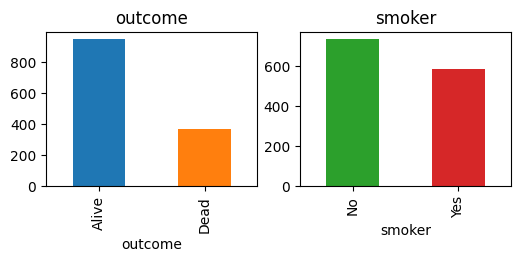

In [12]:
pp.figure(figsize=(6,2))

pp.subplot(1,2,1)
smoking.outcome.value_counts().plot(kind='bar', color=['C0','C1']) 
pp.title('outcome')

pp.subplot(1,2,2)
smoking.smoker.value_counts().plot(kind='bar', color=['C2','C3'])
pp.title('smoker');

<Axes: ylabel='outcome'>

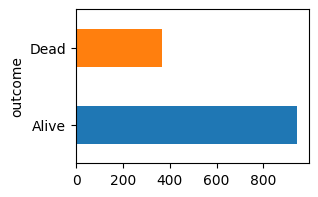

In [13]:
smoking.outcome.value_counts().plot(kind='barh', color=['C0','C1'], figsize=(3,2)) 

<Axes: ylabel='count'>

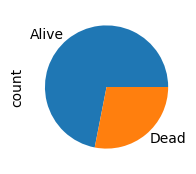

In [14]:
smoking.outcome.value_counts().plot(kind='pie', color=['C0','C1'], figsize=(3,2)) 

In [15]:
grouped = smoking.groupby("smoker", observed=True).outcome.value_counts(normalize=True).unstack()
grouped

outcome,Alive,Dead
smoker,,
No,0.685792,0.314208
Yes,0.761168,0.238832


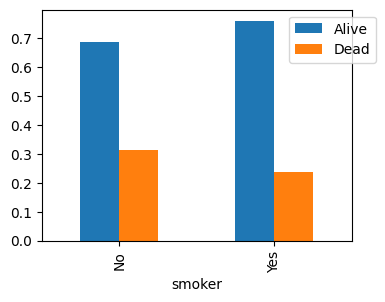

In [16]:
axes = grouped.plot(kind='bar', figsize=(4,3))
axes.legend(loc='upper right', bbox_to_anchor=(1.1, 1)); # fix legend location

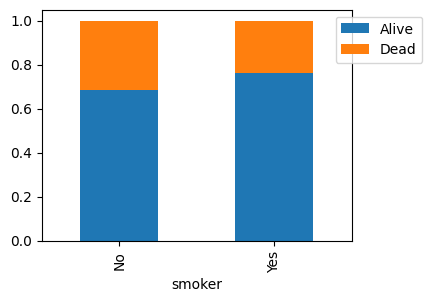

In [17]:
axes = grouped.plot(kind='bar', figsize=(4,3), stacked=True)
axes.legend(loc='upper right', bbox_to_anchor=(1.25, 1)); # fix legend location

In [18]:
regrouped = smoking.groupby(['agegroup', 'smoker'], observed=True).outcome.value_counts(normalize=True).unstack()
regrouped

outcome             Alive      Dead
agegroup smoker                    
(15, 40] No      0.969900  0.030100
         Yes     0.958506  0.041494
(40, 65] No      0.739130  0.260870
         Yes     0.705479  0.294521
(65, 90] No      0.138889  0.861111
         Yes     0.122449  0.877551

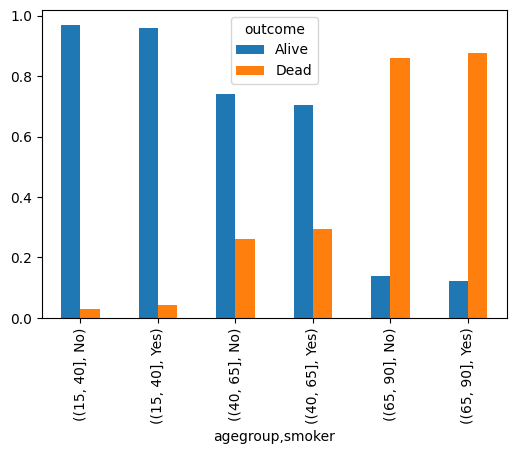

In [19]:
regrouped.plot(kind='bar', figsize=(6,4));

In [ ]:
regrouped = smoking.groupby(['agegroup', 'smoker'], observed=True) \
                   .outcome.value_counts(normalize=True).loc[:,:,'Alive'].unstack()
regrouped

smoker,No,Yes
agegroup,,
"(15, 40]",0.969900,0.958506
"(40, 65]",0.739130,0.705479
"(65, 90]",0.138889,0.122449


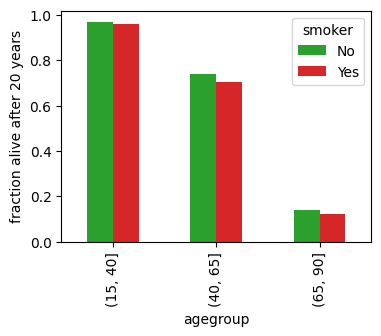

In [21]:
regrouped.plot(kind='bar', color=['C2','C3'], figsize=(4,3));
pp.ylabel('fraction alive after 20 years');